In [1]:
import sympy
from sympy import Matrix
import numpy as np


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Linear algebra

## Session 01: Introduction

## Gerhard Jäger

### April 27, 2022

## Homework

Homework assignments have to be submitted as pdf files via Moodle. You can write them on the computer, but you can also write them by hand to upload fotos.


## Side remark

I will illustrate some concepts computationally, using *Python* and the packages *numpy* and *sympy*.

You can use these tools if you find them helpful, but this is not a required part of the course. It is possible to do all assignments purely with pencil and paper.

# Applications of linear algebra

## Exploratory data analysis, e.g.

<img src="_img/pca.jpg">

# Applications of linear algebra

## Descriptive statistics, e.g correlation


<img src="_img/correlation.svg">

# Applications of linear algebra

## Inferential statistics, e.g. linear regression

<img src="_img/linearRegression.png">



$$
\hat\beta = (X^TX)^{-1}X^TY
$$


# Applications of linear algebra

## Machine learning

<img src="_img/svm.jpg">

# Applications of linear algebra

## Game theory

<img src="_img/prisonersDilemma.jpg">

$$
E(u) = \tau' SRa
$$

# Vectors and linear equations

- basis of linear algebra: solving **linear equations**

- Examples:
$$
\begin{aligned}
    3x + 4y - z &= 0\\
         y + z &= 4\\
    x - y - z &= -5
\end{aligned}
$$

or

$$
\begin{aligned}
    2x -y &= 0\\
    -x + 2y &= 3
\end{aligned}
$$



Let's focus on the second example. We can write this in **matrix notation**.

$$
\begin{aligned}
\begin{bmatrix}
2 & -1\\
-1 & 2
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix} &= \begin{bmatrix}
0 \\
3
\end{bmatrix}
\end{aligned}
$$



Schematically:

$$
A\mathbf{x} = \mathbf{b}
$$

The goal is to find $x$ and $y$, (in general: $\mathbf{b}$) which solve the equation.

Two fundamental ways to approach this problem geometrically:

- **row picture**
- **column picture**

## Row picture

$$2x - y = 0$$

describes a line in a Cartesian plane. So does

$$
-x+2y=3
$$

The solution is where the lines intersect.

In [3]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
y = symbols('y')


<IPython.core.display.Javascript object>


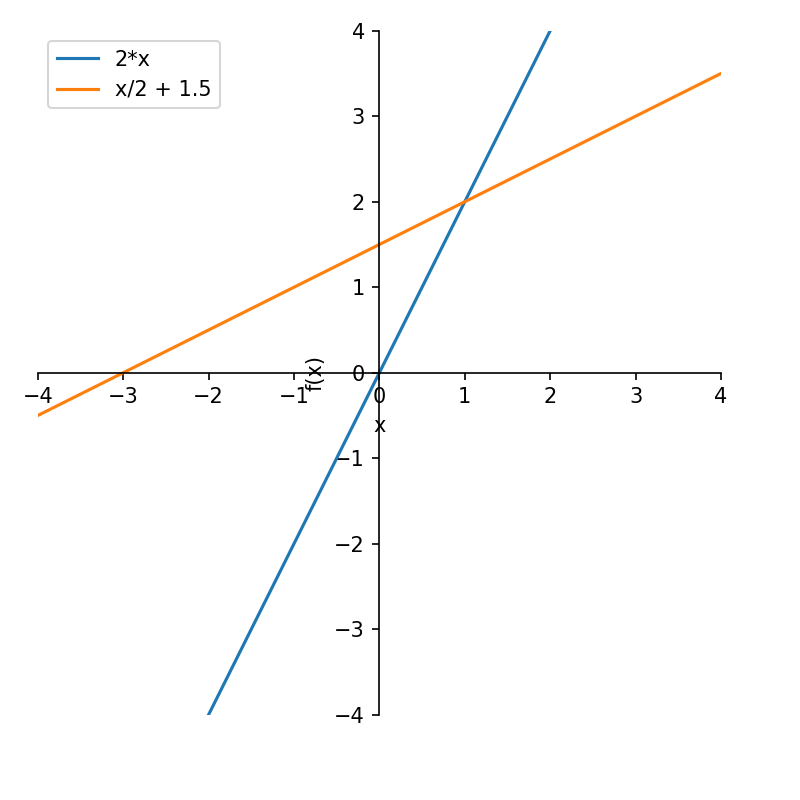

In [4]:
p = plot(2*x, x/2+3/2, legend=True, xlim=(-4,4), ylim=(-4,4), size=(5,5))


## Column picture

recall

$$
\begin{aligned}
\begin{pmatrix}
2 & -1\\
-1 & 2
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix} &= \begin{pmatrix}
0 \\
3
\end{pmatrix}
\end{aligned}
$$

This can be decomposed into


$$
\begin{aligned}
\begin{pmatrix}
2 \\
-1 
\end{pmatrix}x + 
\begin{pmatrix}
-1\\
2
\end{pmatrix} y&= \begin{pmatrix}
0 \\
3
\end{pmatrix}
\end{aligned}
$$

<IPython.core.display.Javascript object>


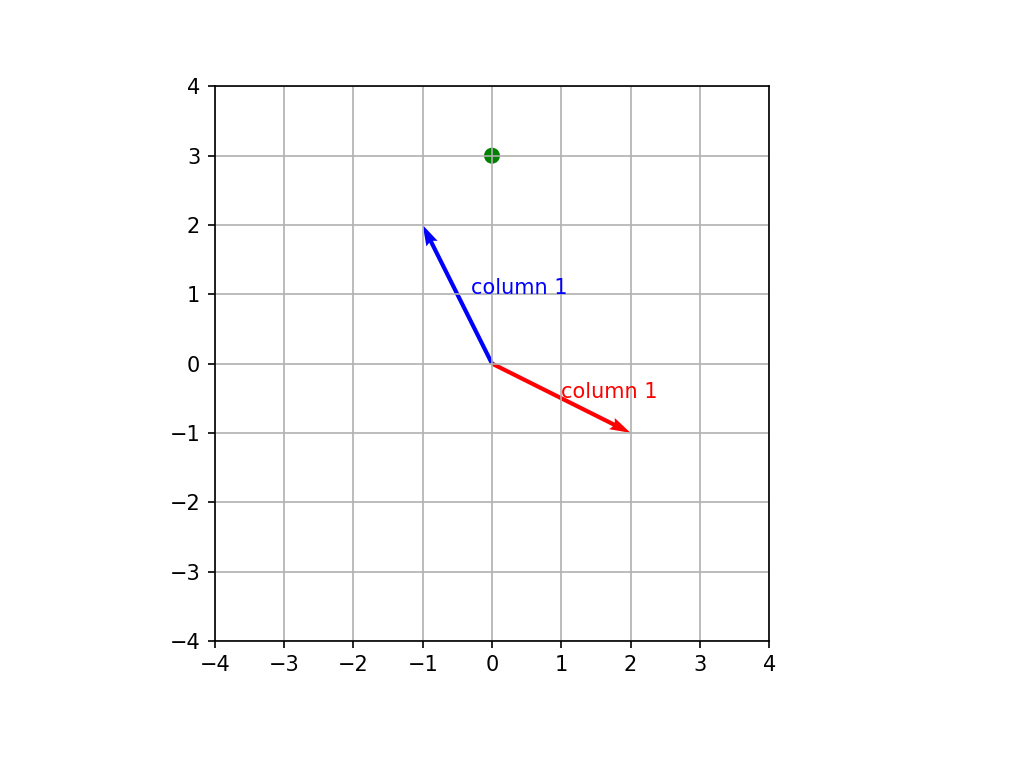

In [5]:
fig, ax = plt.subplots()
q1 = ax.quiver(0,0,2,-1, units='xy', scale=1, color='red')
q1 = ax.quiver(0,0,-1,2, units='xy', scale=1, color='blue')
c = plt.Circle((0,3), radius=.1, color='green')
ax.add_patch(c)
plt.grid()
ax.set_aspect('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.annotate("column 1", (1,-.5), color='red')
plt.annotate("column 1", (-.3,1), color='blue')
plt.show()

Vectors can be multiplied with real numbers.

Let us multiply the second column with 2.

<IPython.core.display.Javascript object>


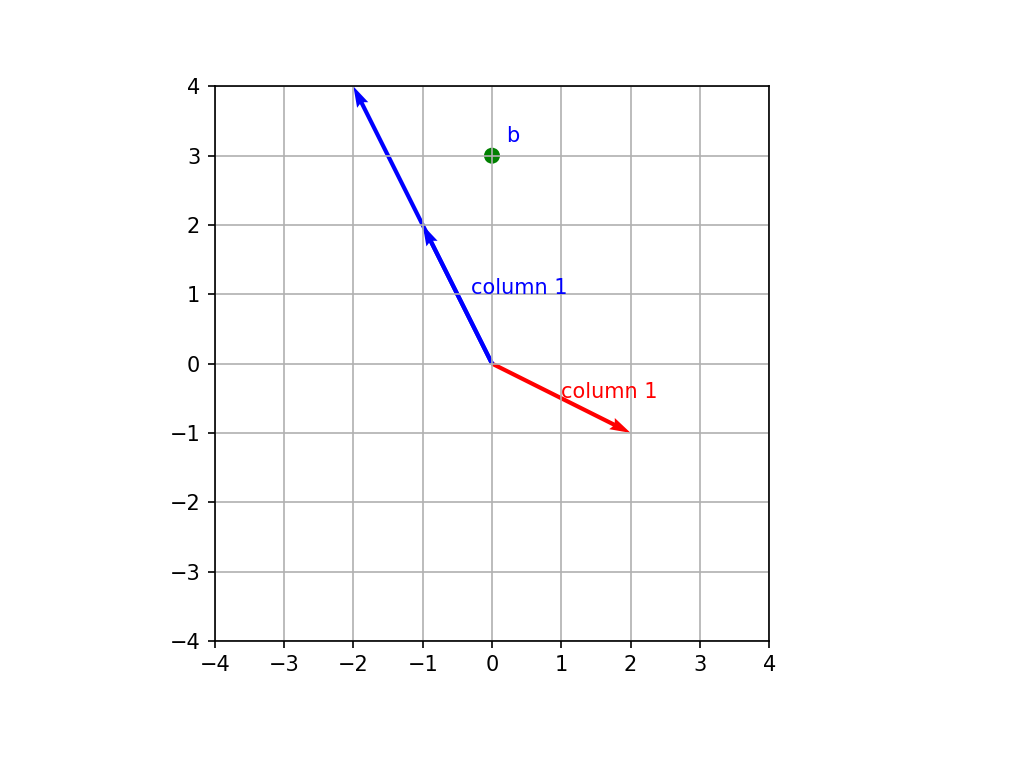

In [6]:
fig, ax = plt.subplots()
q1 = ax.quiver(0,0,2,-1, units='xy', scale=1, color='red')
q2 = ax.quiver(0,0,-2,4, units='xy', scale=1, color='blue')
q3 = ax.quiver(0,0,-1,2, units='xy', scale=1, color='blue')
c = plt.Circle((0,3), radius=.1, color='green')
ax.add_patch(c)
plt.grid()
ax.set_aspect('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.annotate("column 1", (1,-.5), color='red')
plt.annotate("column 1", (-.3,1), color='blue')
plt.annotate("b", (.2,3.2), color='blue')
plt.show()

Vectors can also be added. Let's add column one to 2*(column 1).

<IPython.core.display.Javascript object>


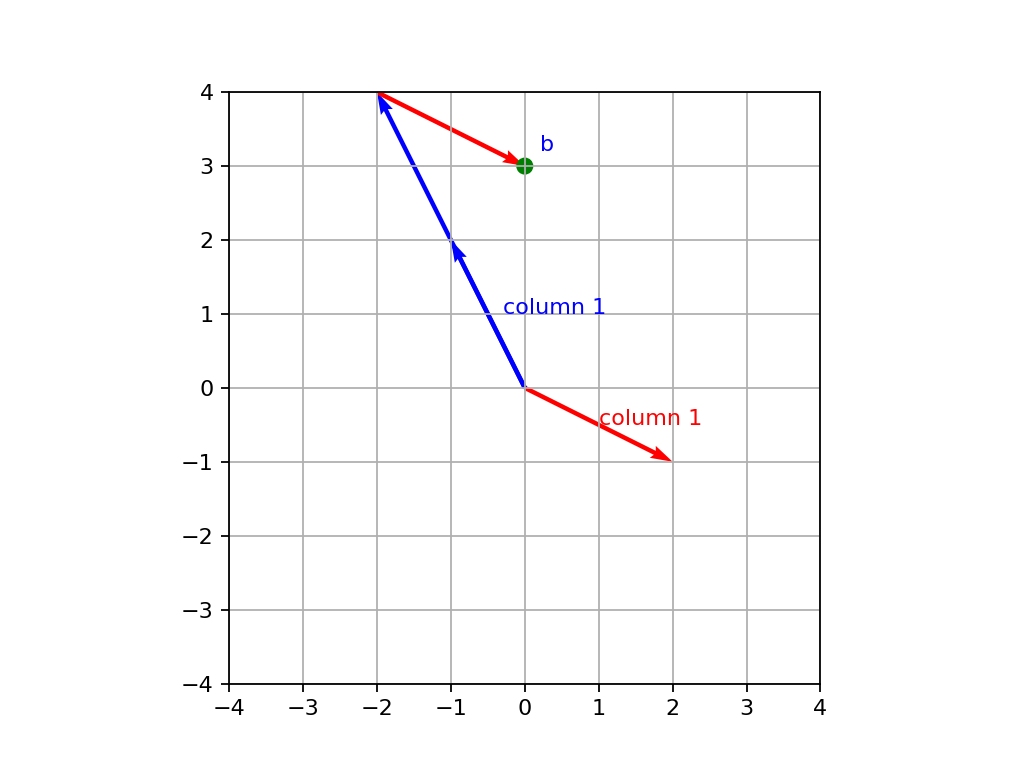

In [21]:
fig, ax = plt.subplots()
q1 = ax.quiver(0,0,2,-1, units='xy', scale=1, color='red')
q2 = ax.quiver(0,0,-2,4, units='xy', scale=1, color='blue')
q3 = ax.quiver(0,0,-1,2, units='xy', scale=1, color='blue')
q4 = ax.quiver(-2,4,2,-1, units='xy', scale=1, color='red')
c = plt.Circle((0,3), radius=.1, color='green')
ax.add_patch(c)
plt.grid()
ax.set_aspect('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.annotate("column 1", (1,-.5), color='red')
plt.annotate("column 1", (-.3,1), color='blue')
plt.annotate("b", (.2,3.2), color='blue')
plt.show()

- so our solution is
$$
\begin{aligned}
x &= 1\\
y &= 2
\end{aligned}
$$

### 3 equations with three unknowns

$$
\begin{aligned}
x + 2y + 3z &= 6\\
2x + 5y + 2z &= 4\\
6x -3y +z &=2
\end{aligned}
$$

### row picture

A linear equation in three unknowns describes a **plane** in a 3-dimensional space.



In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


first row:

<IPython.core.display.Javascript object>


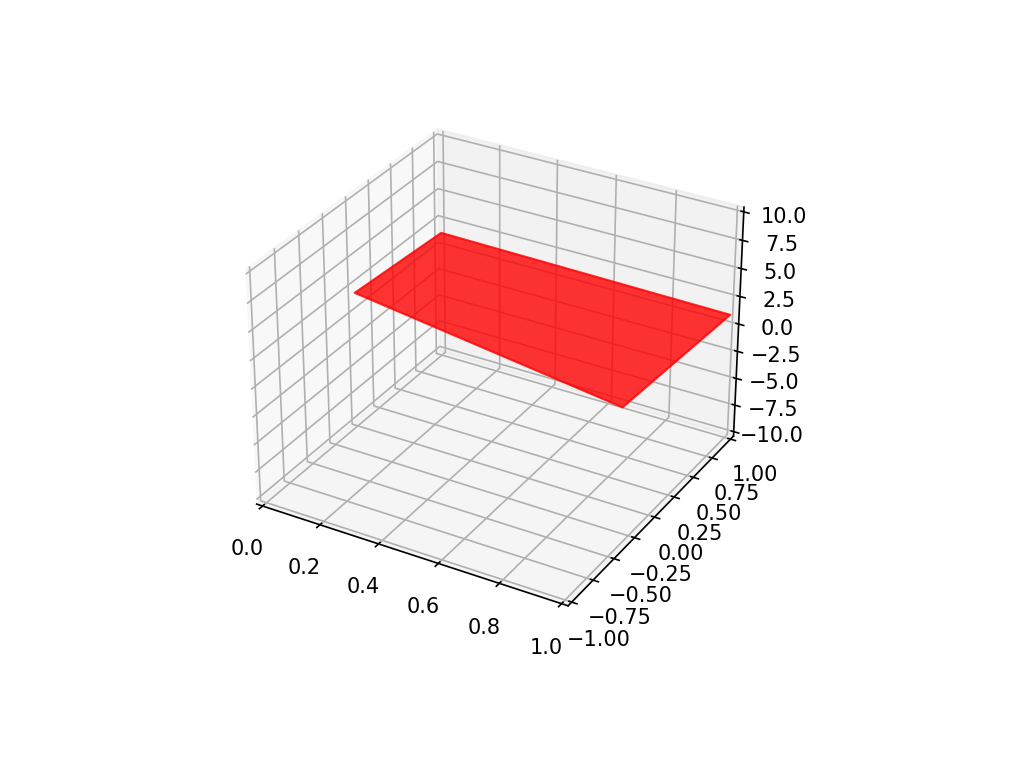

(-10.0, 10.0)

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = [0, 0,1,1]
y = [0, 1, 1, -4/11]
z1 = [2.0, 1.3333333333333335, 1.0, 1.9090909090909092]

vertices = [list(zip(x,y,z1))]
poly1 = Poly3DCollection(vertices, alpha=0.8, color='red')
ax.add_collection3d(poly1)
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.set_zlim(-10,10)

second row

<IPython.core.display.Javascript object>


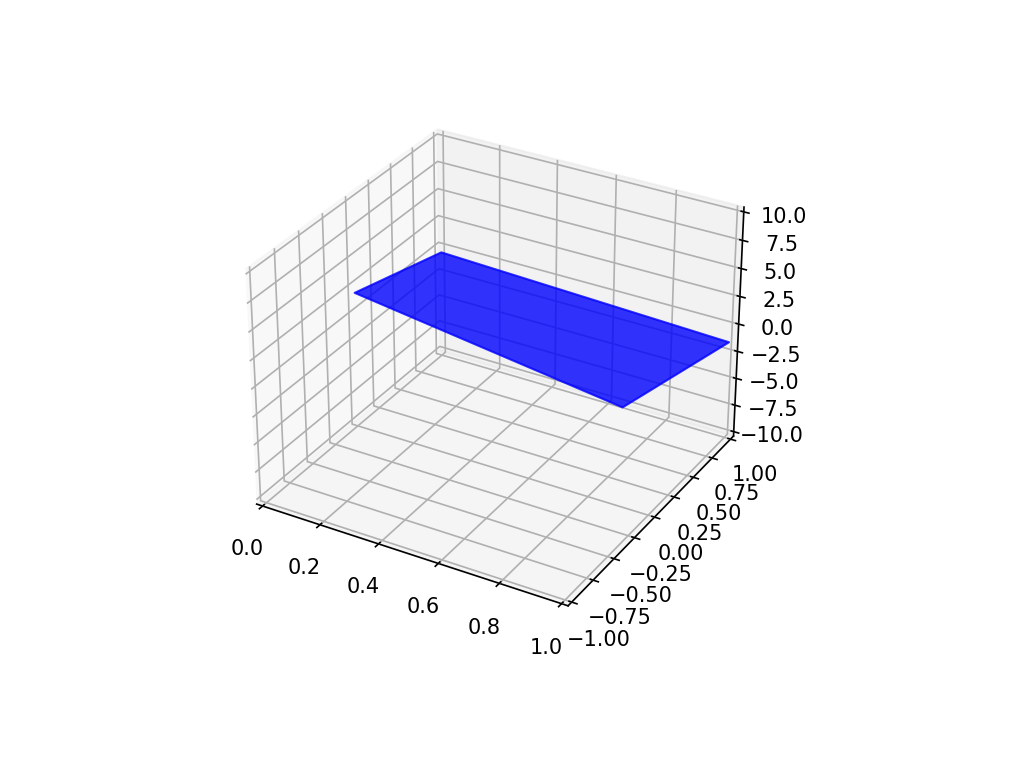

(-10.0, 10.0)

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z2 = [2.0, -0.5, -1.5, 1.9090909090909092]
vertices = [list(zip(x,y,z2))]
poly2 = Poly3DCollection(vertices, alpha=0.8, color='blue')
ax.add_collection3d(poly2)
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.set_zlim(-10,10)

both rows together

<IPython.core.display.Javascript object>


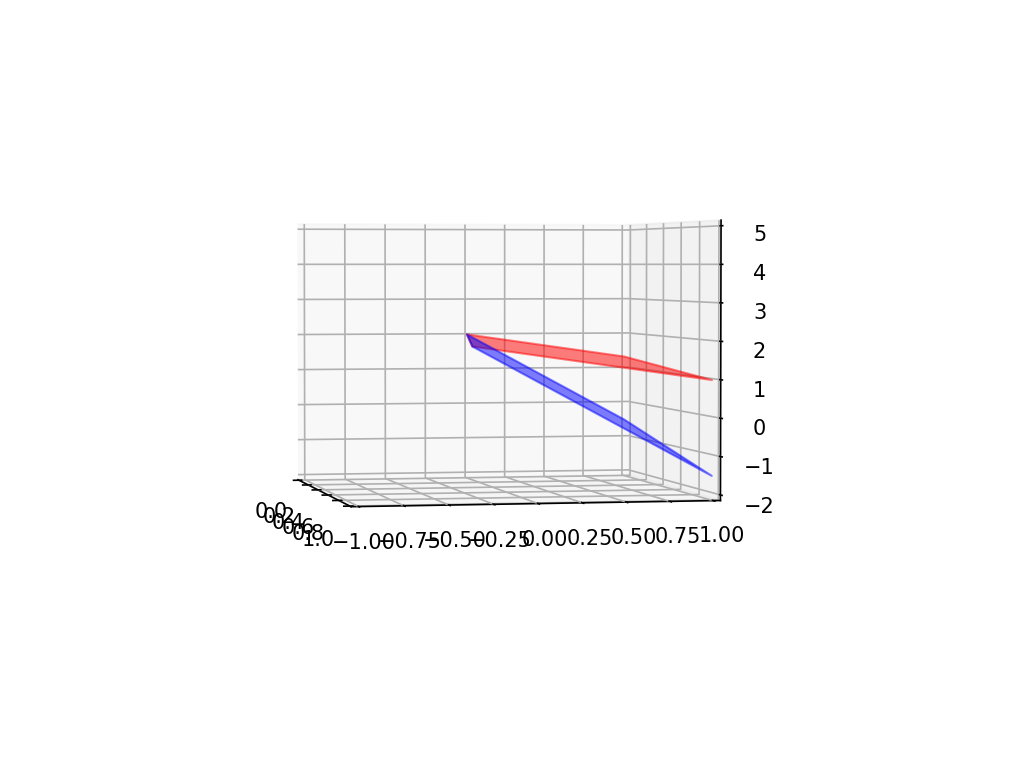

(-2.0, 5.0)

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
vertices1 = [list(zip(x,y,z1))]
vertices2 = [list(zip(x,y,z2))]
poly1 = Poly3DCollection(vertices1, alpha=0.5, color='red')
poly2 = Poly3DCollection(vertices2, alpha=0.5, color='blue')
ax.add_collection3d(poly1)
ax.add_collection3d(poly2)
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.set_zlim(-2,5)

third row

<IPython.core.display.Javascript object>


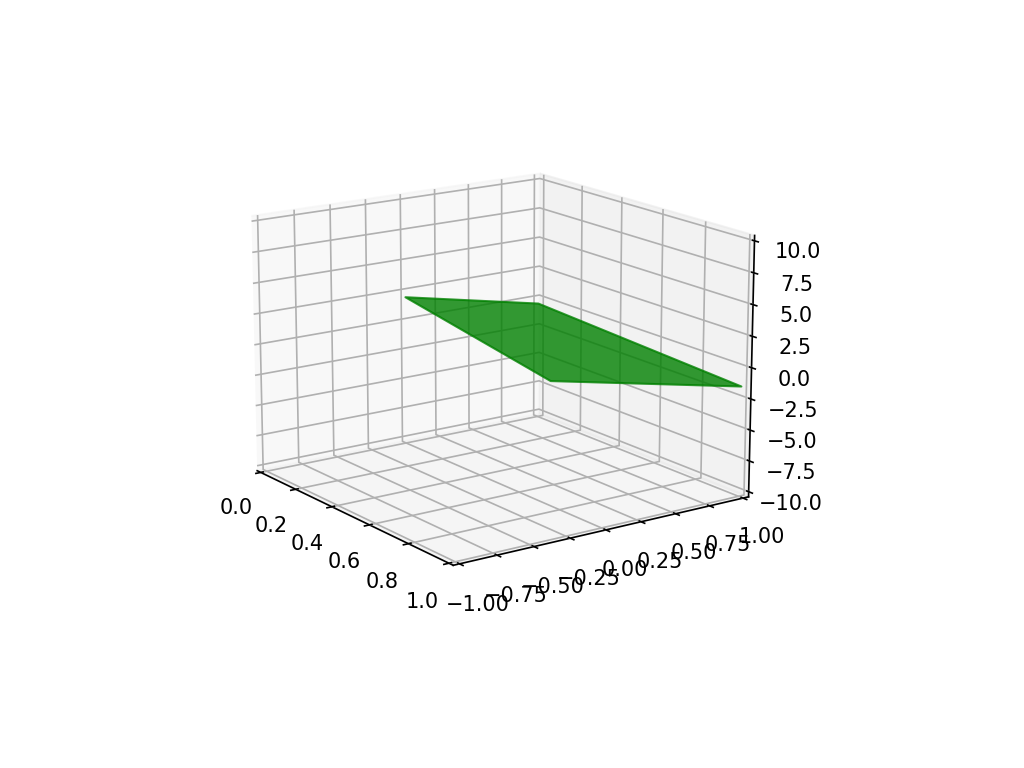

(-10.0, 10.0)

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z3 = [2, 5, -1, -5.090909090909091]
vertices3 = [list(zip(x,y,z3))]
poly3 = Poly3DCollection(vertices, alpha=0.8, color='green')
ax.add_collection3d(poly3)
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.set_zlim(-10,10)

all three rows together

<IPython.core.display.Javascript object>


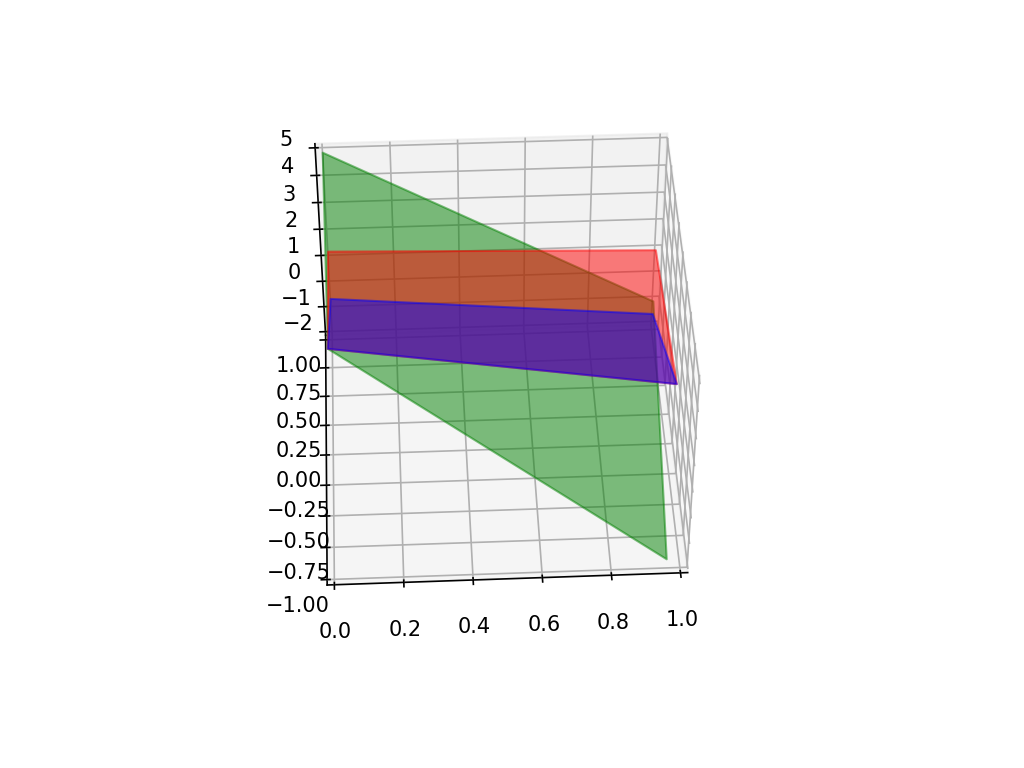

(-2.0, 5.0)

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
vertices1 = [list(zip(x,y,z1))]
vertices2 = [list(zip(x,y,z2))]
poly1 = Poly3DCollection(vertices1, alpha=0.5, color='red')
poly2 = Poly3DCollection(vertices2, alpha=0.5, color='blue')
poly3 = Poly3DCollection(vertices3, alpha=0.5, color='green')
ax.add_collection3d(poly1)
ax.add_collection3d(poly2)
ax.add_collection3d(poly3)
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.set_zlim(-2,5)

- the solution set for each row is a **plane**
- the intersection of two plane (if they are not parallel) is a **line**
- the intersection of three planes is a **point**

This point is the solution of the system of equations.

### column picture

recall the system to be solved:

$$
\begin{aligned}
x + 2y + 3z &= 6\\
2x + 5y + 2z &= 4\\
6x -3y +z &=2
\end{aligned}
$$

- can be rewritten as 

$$
\pmatrix{1\\2\\6}x + \pmatrix{2\\5\\3}y+\pmatrix{3\\2\\1}z = \pmatrix{6\\4\\2}
$$

<IPython.core.display.Javascript object>


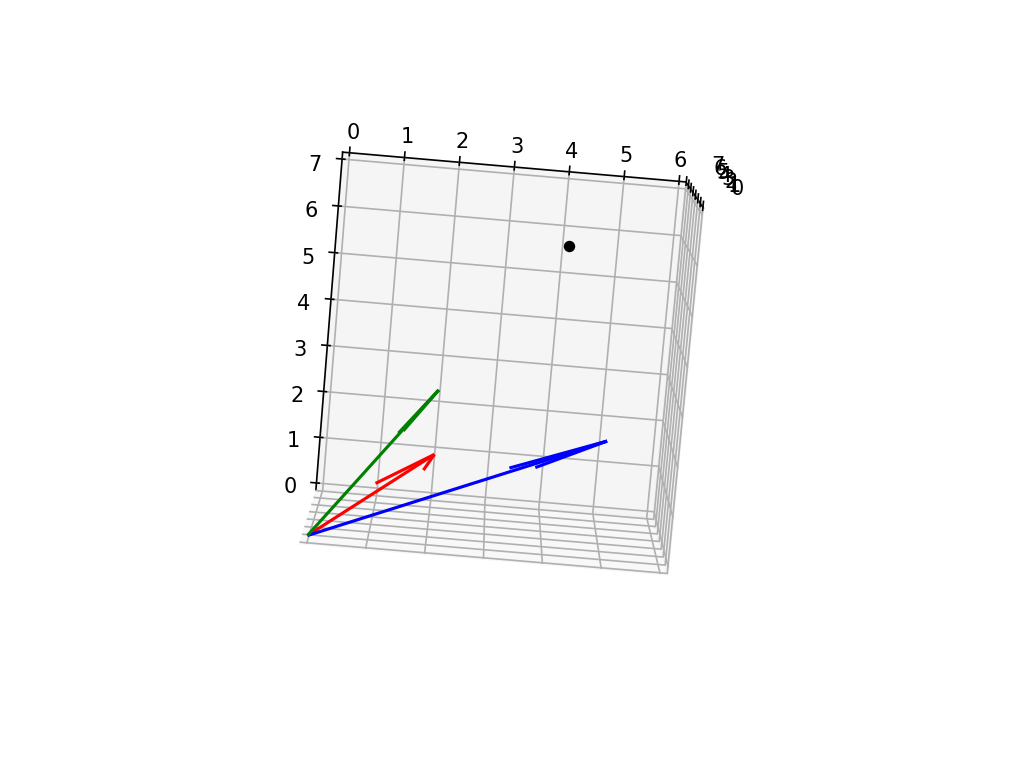

In [13]:
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver((0,), (0,), (0,), (1,), (2,), (6,), color='red')
ax.quiver((0,), (0,), (0,), (2,), (5,), (3,), color='blue')
ax.quiver((0,), (0,), (0,), (3,), (2,), (1,), color='green')
ax.scatter((6,), (4,), (2,), color='black')
ax.set_xlim([0, 7])
ax.set_ylim([0, 6])
ax.set_zlim([0,7])
plt.show()

- We can see with the bare eye that **b** is a multiple of the third column vector. So the solutions for $x$ and $y$ are $0$. The solution for $z$ happens to be 2.



We have 
$$
\begin{aligned}
A &= \pmatrix{
    1 & 2 & 3\\
    2 & 5 & 2\\
    6 & 3 & 1}\\
\mathbf{b} &= \pmatrix{6\\4\\2}\\
A\mathbf{x} &= \mathbf{b}
\end{aligned}
$$

The solution is

$$
\mathbf{x} = \pmatrix{0\\0\\2}
$$

### Big question?

- Is there a solution of this equation for every $\mathbf{b}$?


- What would $A$ have to look like to get a different answer?

# Back to the basics

- a **vector** is an ordered sequence of $n$ real numbers
- geometrically, a vector can be interpreted as a point in the $n$-dimensional spac
- 2 dimensions equals plane

<IPython.core.display.Javascript object>


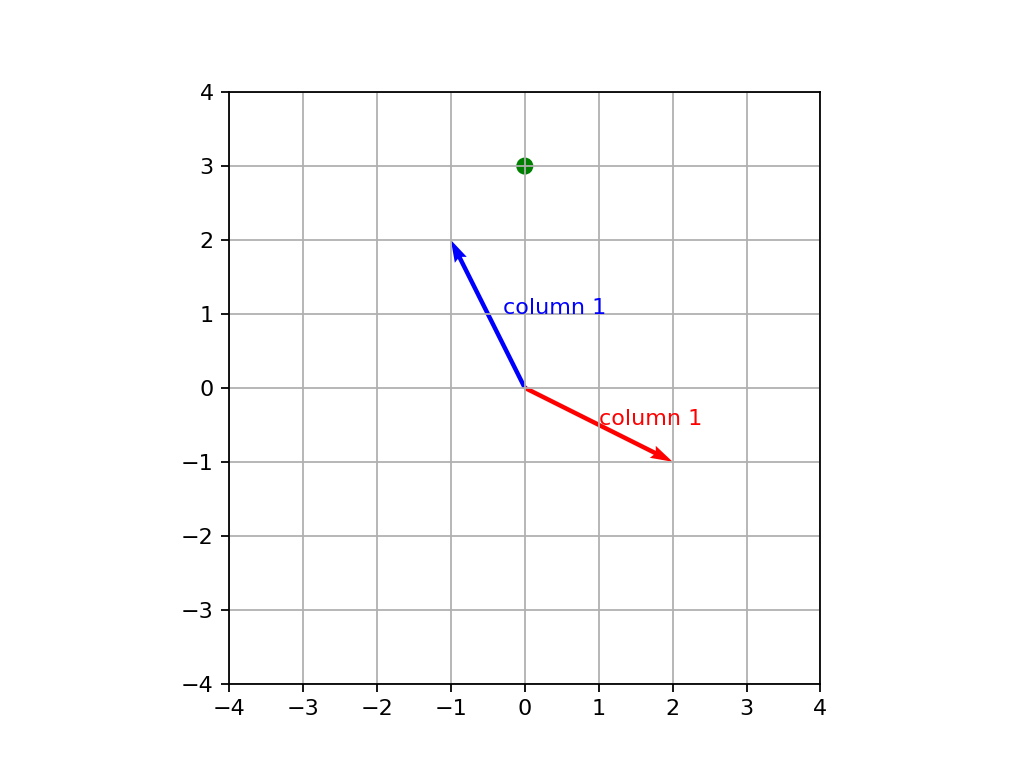

In [22]:
fig, ax = plt.subplots()
q1 = ax.quiver(0,0,2,-1, units='xy', scale=1, color='red')
q1 = ax.quiver(0,0,-1,2, units='xy', scale=1, color='blue')
c = plt.Circle((0,3), radius=.1, color='green')
ax.add_patch(c)
plt.grid()
ax.set_aspect('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.annotate("column 1", (1,-.5), color='red')
plt.annotate("column 1", (-.3,1), color='blue')
plt.show()

- 3 dimension equals space

<IPython.core.display.Javascript object>


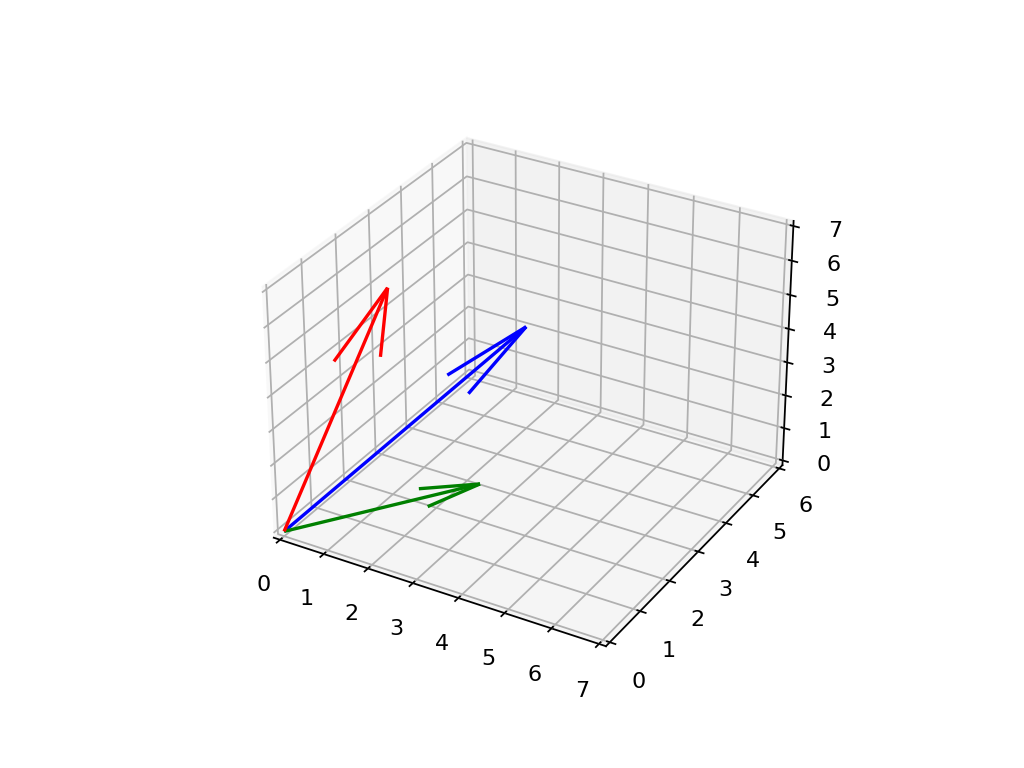

In [23]:
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver((0,), (0,), (0,), (1,), (2,), (6,), color='red')
ax.quiver((0,), (0,), (0,), (2,), (5,), (3,), color='blue')
ax.quiver((0,), (0,), (0,), (3,), (2,), (1,), color='green')
ax.set_xlim([0, 7])
ax.set_ylim([0, 6])
ax.set_zlim([0,7])
plt.show()

- higher dimensions are hard to visualize, but beyond that, there is nothing special about them
- vectors are usually written as bold-faced lowercase letter, like $\mathbf{x, y, z, u, v}$
- when the individual cells are spelled out, a vector is written als a *column*



- individual components of a vector are indicated by subscript. If
$$
\mathbf{x} = \pmatrix{8\\6\\1},
$$
then 
$$
\begin{aligned}
x_1 &= 8\\
x_2 &= 6\\
x_3 &= 1
\end{aligned}
$$

## vector operations

- vectors can be **added**, provided they have the same length/dimensionality

$$
\begin{aligned}
\mathbf{x}+\mathbf{y} &\doteq  \pmatrix{x_1+y_1\\
x_2+y_2\\
\vdots\\
x_n+y_n
}
\end{aligned}
$$

- vector addition is
    - commutative
        $$\mathbf{x}+\mathbf{y} = \mathbf{y}+\mathbf{x}$$
        
    - associative
    $$(\mathbf{x}+\mathbf{y})+\mathbf{z} = \mathbf{x} + (\mathbf{y}+\mathbf{z})$$

## vector operations

- vectors can be **multiplied with real numbers**

$$
a \cdot \mathbf{x} \doteq \pmatrix{a\cdot x_1\\
a\cdot x_2\\
\vdots\\
a\cdot x_n}
$$

Real numbers are often called **scalars**, to distinguish them from vectors. Multiplication of a vector with a scalar is called **scalar multiplication**.

Scalar multiplication and vector addition obey the **distributive law**:

$$
a\cdot (\mathbf{x} + \mathbf{y}) = a\mathbf{x} + a\mathbf{y}
$$

### geometric interpretation

- vectors can also be seen as *equivalence classes of pairs of points* in the $n$-dimensional space
- often drawn as an arrow
- two arrows represent the same vector if they have the same length and direction

<img src="_img/equivalentVectors.svg">

- vector addition $\mathbf{x}+\mathbf{y}$ amounts to moving the start point of $\mathbf{y}$ to the end point of $\mathbf{x}$ and connecting the start point of $\mathbf{x}$ to the end point of $\mathbf{y}$.

<img src="_img/vectorAddition.svg">

### important questions:

- Let $\mathbf{x} = \pmatrix{1\\-1}$. What is the set of vectors $\{a\textbf{x}|a\in\mathbb{R}\}$?
- Let $\mathbf{y} = \pmatrix{1\\1}$. What is the set of vectors
$
\{a\mathbf{x}+b\mathbf{y}|a,b\in\mathbb{R}\}
$?

A **linear combination** of vectors is the result of applying scalar multiplication and vector addition to 
them.

So the last question amounts to: *What is the set of linear combinations of $\mathbf{x}$ and $\mathbf{y}$?*

### inner product

- the **inner product** of two vectors is a scalar

$$
\begin{aligned}
\mathbf{x}\cdot \mathbf{y} &\doteq x_1y_1 + x_2y_2 + \cdots + x_n y_n\\
&= \sum_i x_iy_i
\end{aligned}
$$
(Sometimes the inner proudct is written $\langle\mathbf{x}, \mathbf{y}\rangle$.)

- the inner product is commutative 

$$
\mathbf{x}\cdot \mathbf{y} = \mathbf{y}\cdot \mathbf{x}
$$

- Furthermore, the inner product is **linear** in both arguments

$$
\begin{aligned}
(a\mathbf{x})\cdot(b\mathbf{y}) &= ab(\mathbf{x}\cdot\mathbf{y})\\
\mathbf{x}\cdot(\mathbf{y} + \mathbf{z}) &= \mathbf{x}\cdot\mathbf{y} + \mathbf{x}\cdot\mathbf{z}\\
(\mathbf{x}+\mathbf{y})\cdot\mathbf{z} &= \mathbf{x}\cdot\mathbf{z} + \mathbf{y}\cdot\mathbf{z}
\end{aligned}
$$


### norm of a vector

The **norm** (=length) of a vector is defined as

$$
\begin{aligned}
\|\mathbf{x}\| &\doteq \sqrt{\mathbf{x}\cdot \mathbf{x}} \\
&= \sqrt{\sum_i x_i^2}
\end{aligned}
$$

### properties of the norm

- for all vectors $\mathbf{x}, \mathbf{y}$ and scalars $a$:

$$
\begin{aligned}
\|\mathbf{x}\| &\geq 0\\
\|\mathbf{x}\| &= 0 \mbox{ if and only if } \mathbf{x} = \mathbf{0} ~(\forall i.x_i = 0)\\
\|a\mathbf{x}\| &= a\|\mathbf{x}\|\\
\|\mathbf{x}+\mathbf{y}\| &\leq \|\mathbf{x}\|+\|\mathbf{y}\|
\end{aligned}
$$